# LEND CASE STUDY
***

## Business Objective
***
To identify risky loan applicants by EDA

## Data considered for analyis
***
__Since we have to only analyse the patterns of Defaulters, the loan_status for "Charged Off" is only considered in the analysis__

## Data Analysis

### 1. Data cleansing Rows
All rows for "Fully Paid Off" and "Current" are dropped.
This reduces the number of rows from 39717 to 5627 and helps to only focus on the Defaulters to identify pattern

### 2. Data cleansing Columns
Also the columns with only null values are dropped as they do not contribute to data analaysis

### 3. Converting data types of columns required for analysis
Columns below are converted to remove strings and treat as numbers for allowing continuous variable analysis

    1. interest_rate 
    2. term

### 4. Data imputation

Column below has null values so they are imputed with __mode__ to support the analysis

    1. emp_length

### 5. Adding new columns
Additional column has been added to analyse if these factors show any pattern towards defaulters -

    1. Monthly Income 
    2. Percentage of installment paid each month
    3. Issue Month
    4. Issue Date

### 6. Data Analysis using Univariate (one column) to understand its pattern towards Defaulters
#### 6.1 Categorical Ordered
    1. Grade
    2. Employment Length
    3. Issue Month
    4. Issue Date
    5. Term
    
#### 6.2 Categorical UnOrdered
    6. Purpose
    7. Home Ownership
    8. Address State
    9. Verification Statua
    
#### 6.3 Continuous 
    10. Loan Amount
    11. Interest Rate
    12. Installment
    13. Percentage of Amount towards installements

### 7. Data Analysis using Bivariate (two column) to understand its pattern towards Defaulters

    1. Monthly Income v/s Installment Amount
    2. Loan Amount v/s Annual Income
    3. Loan Amount v/s Payment Received

### 8. Correlation analysis of continuous variables 
    1. Loan Amount
    2. Annual Income
    3. Interest rate
    4. Total payemnt received

## Observations from above analysis for Defaulters
 1. Grade -> Most defaulters have grade of "B" followed by "A" and "C"
 2. Employment Length -> Most defaulters have Employment length for more than 10 years
 3. Issue Month -> Most defaulters have taken loan in months of December" followed by "November" and "October" (Last quater)
 4. Issue Date -> Most defaulters have taken loan in dates 11th followed by 10th
 5. Term -> Most defaulters have loan term of 36 months
 6. Purpose -> Most defaulters take loan for the purpose of "Debt Consolidation" 
 7. Home Ownership -> Most defaulters has home ownership status of "Rent" and "Mortgage"
 8. Address State ->  Most defaulters are from state CA
 9. Verification Status -> Verification status has no significant difference on the Defaulters. The number of defaulters with "Source Verified" are                                less compared to the other verification status
 10. Loan Amount -> Most defaulters have loan amount between 5000-15000
 11. Interest Rate -> Most defaulters have interest rate between 10%-15%
 12. Installment -> Most defaulters have installment between 200-400
 13. Percentage of Amount towards installements -> Most defaulters have installments between 5%-10% of their monthly income
 14. Monthly Income v/s Installment Amount -> Most defaulters have monthly income between 3000-5000 and installation amount between 200-320 and show                                                similar pattern
 15. Annual Income v/s Loan Amount -> Most defaulters have annual income between 30000-60000 and loan amount between 10000-25000 and show                                                similar pattern
 16. Loan Amount v/s Payment Received ->  Payment received is proportional to the loan amount
 17. Correlation ->  Interest Rate(%),  Loan Amount, Annual Income, Total Payment Received
     
> Weak
1.  Interest Rate(%) & Annual Income
2. Interest Rate(%) & Total Payment Received 
3. Annual Income  & Total Payment Received

> Strong 
1. Loan Amount & Total Payment Received
     

In [173]:
# Importing DataSet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
loan = pd.read_csv(r'C:\Users\shrey\Downloads\loan (1)\loan.csv')
# Checking null values
loan.isnull().sum().sort_values(ascending=False)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Analysing columns and data purging

In [174]:
# Dropping all NA/null columns to reduce the dataset and reducing unnecessary memory usage
loan = loan.dropna(axis=1,how='all')
# Checking null values again
loan.isnull().sum().sort_values(ascending=False)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Checking values for below columns to analyse for plotting

In [31]:
# Grade
loan.grade.value_counts()
loan.home_ownership.value_counts()
loan.int_rate.value_counts()
loan.columns[loan.nunique() <= 1]
loan.total_acc.value_counts()
loan.int_rate.value_counts()
loan.issue_d.value_counts()

issue_d
Dec-11    2260
Nov-11    2223
Oct-11    2114
Sep-11    2063
Aug-11    1928
Jul-11    1870
Jun-11    1827
May-11    1689
Apr-11    1562
Mar-11    1443
Jan-11    1380
Feb-11    1297
Dec-10    1267
Oct-10    1132
Nov-10    1121
Jul-10    1119
Sep-10    1086
Aug-10    1078
Jun-10    1029
May-10     920
Apr-10     827
Mar-10     737
Feb-10     627
Nov-09     602
Dec-09     598
Jan-10     589
Oct-09     545
Sep-09     449
Aug-09     408
Jul-09     374
Jun-09     356
May-09     319
Apr-09     290
Mar-09     276
Feb-09     260
Jan-09     239
Mar-08     236
Dec-08     223
Nov-08     184
Feb-08     174
Jan-08     171
Apr-08     155
Oct-08      96
Dec-07      85
Jul-08      83
May-08      71
Aug-08      71
Jun-08      66
Oct-07      47
Nov-07      37
Aug-07      33
Sep-08      32
Jul-07      30
Sep-07      18
Jun-07       1
Name: count, dtype: int64

In [175]:
## Considering only rows for "Default" as "Current" and "Fully Paid" are not in scope of anaylysis

loan.drop(loan[loan.loan_status =="Fully Paid"].index, inplace=True)
loan.drop(loan[loan.loan_status =="Current"].index, inplace=True)
#loan.info()
loan.loan_status.value_counts()
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 1 to 39688
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5627 non-null   int64  
 1   member_id                   5627 non-null   int64  
 2   loan_amnt                   5627 non-null   int64  
 3   funded_amnt                 5627 non-null   int64  
 4   funded_amnt_inv             5627 non-null   float64
 5   term                        5627 non-null   object 
 6   int_rate                    5627 non-null   object 
 7   installment                 5627 non-null   float64
 8   grade                       5627 non-null   object 
 9   sub_grade                   5627 non-null   object 
 10  emp_title                   5143 non-null   object 
 11  emp_length                  5399 non-null   object 
 12  home_ownership              5627 non-null   object 
 13  annual_inc                  5627 non-

In [176]:
# Forming new coloumns of issue date and issue month
loan.issue_m = loan.issue_d.str[:3]
loan.issue_m.value_counts()
loan.issue_date = loan.issue_d.str[4:]
loan.issue_date.value_counts()
loan.emp_length.value_counts()

emp_length
10+ years    1331
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: count, dtype: int64

In [177]:
#Filling employment length by mode
loan.emp_length.isna().sum()
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)
loan.emp_length.isna().sum()
loan.emp_length.value_counts()

emp_length
10+ years    1559
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: count, dtype: int64

In [178]:
# Data cleansing for interest rate
loan.int_rate = loan.int_rate.apply(lambda x: round(float(x.replace('%', '').strip()),2))
loan.int_rate.value_counts()

loan.term = loan.term.apply(lambda x: int(x.replace('months', '').strip()))
loan.term.value_counts()

term
36    3227
60    2400
Name: count, dtype: int64

In [180]:
# Adding new column for monthly income  
loan.monthly_inc = round(loan.annual_inc/12)
# Adding new column of percentage of amount to be paid as installment
loan.monthly_installment_per = round( loan.installment/loan.monthly_inc,2)
loan.monthly_installment_per.value_counts()

0.05    543
0.04    542
0.03    540
0.06    517
0.08    458
0.07    456
0.09    393
0.02    383
0.10    327
0.11    295
0.12    230
0.01    210
0.13    186
0.14    146
0.15    119
0.16     92
0.17     55
0.18     46
0.19     27
0.20     23
0.22     11
0.21      8
0.23      6
0.00      6
0.24      3
0.25      2
0.26      1
0.29      1
0.30      1
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

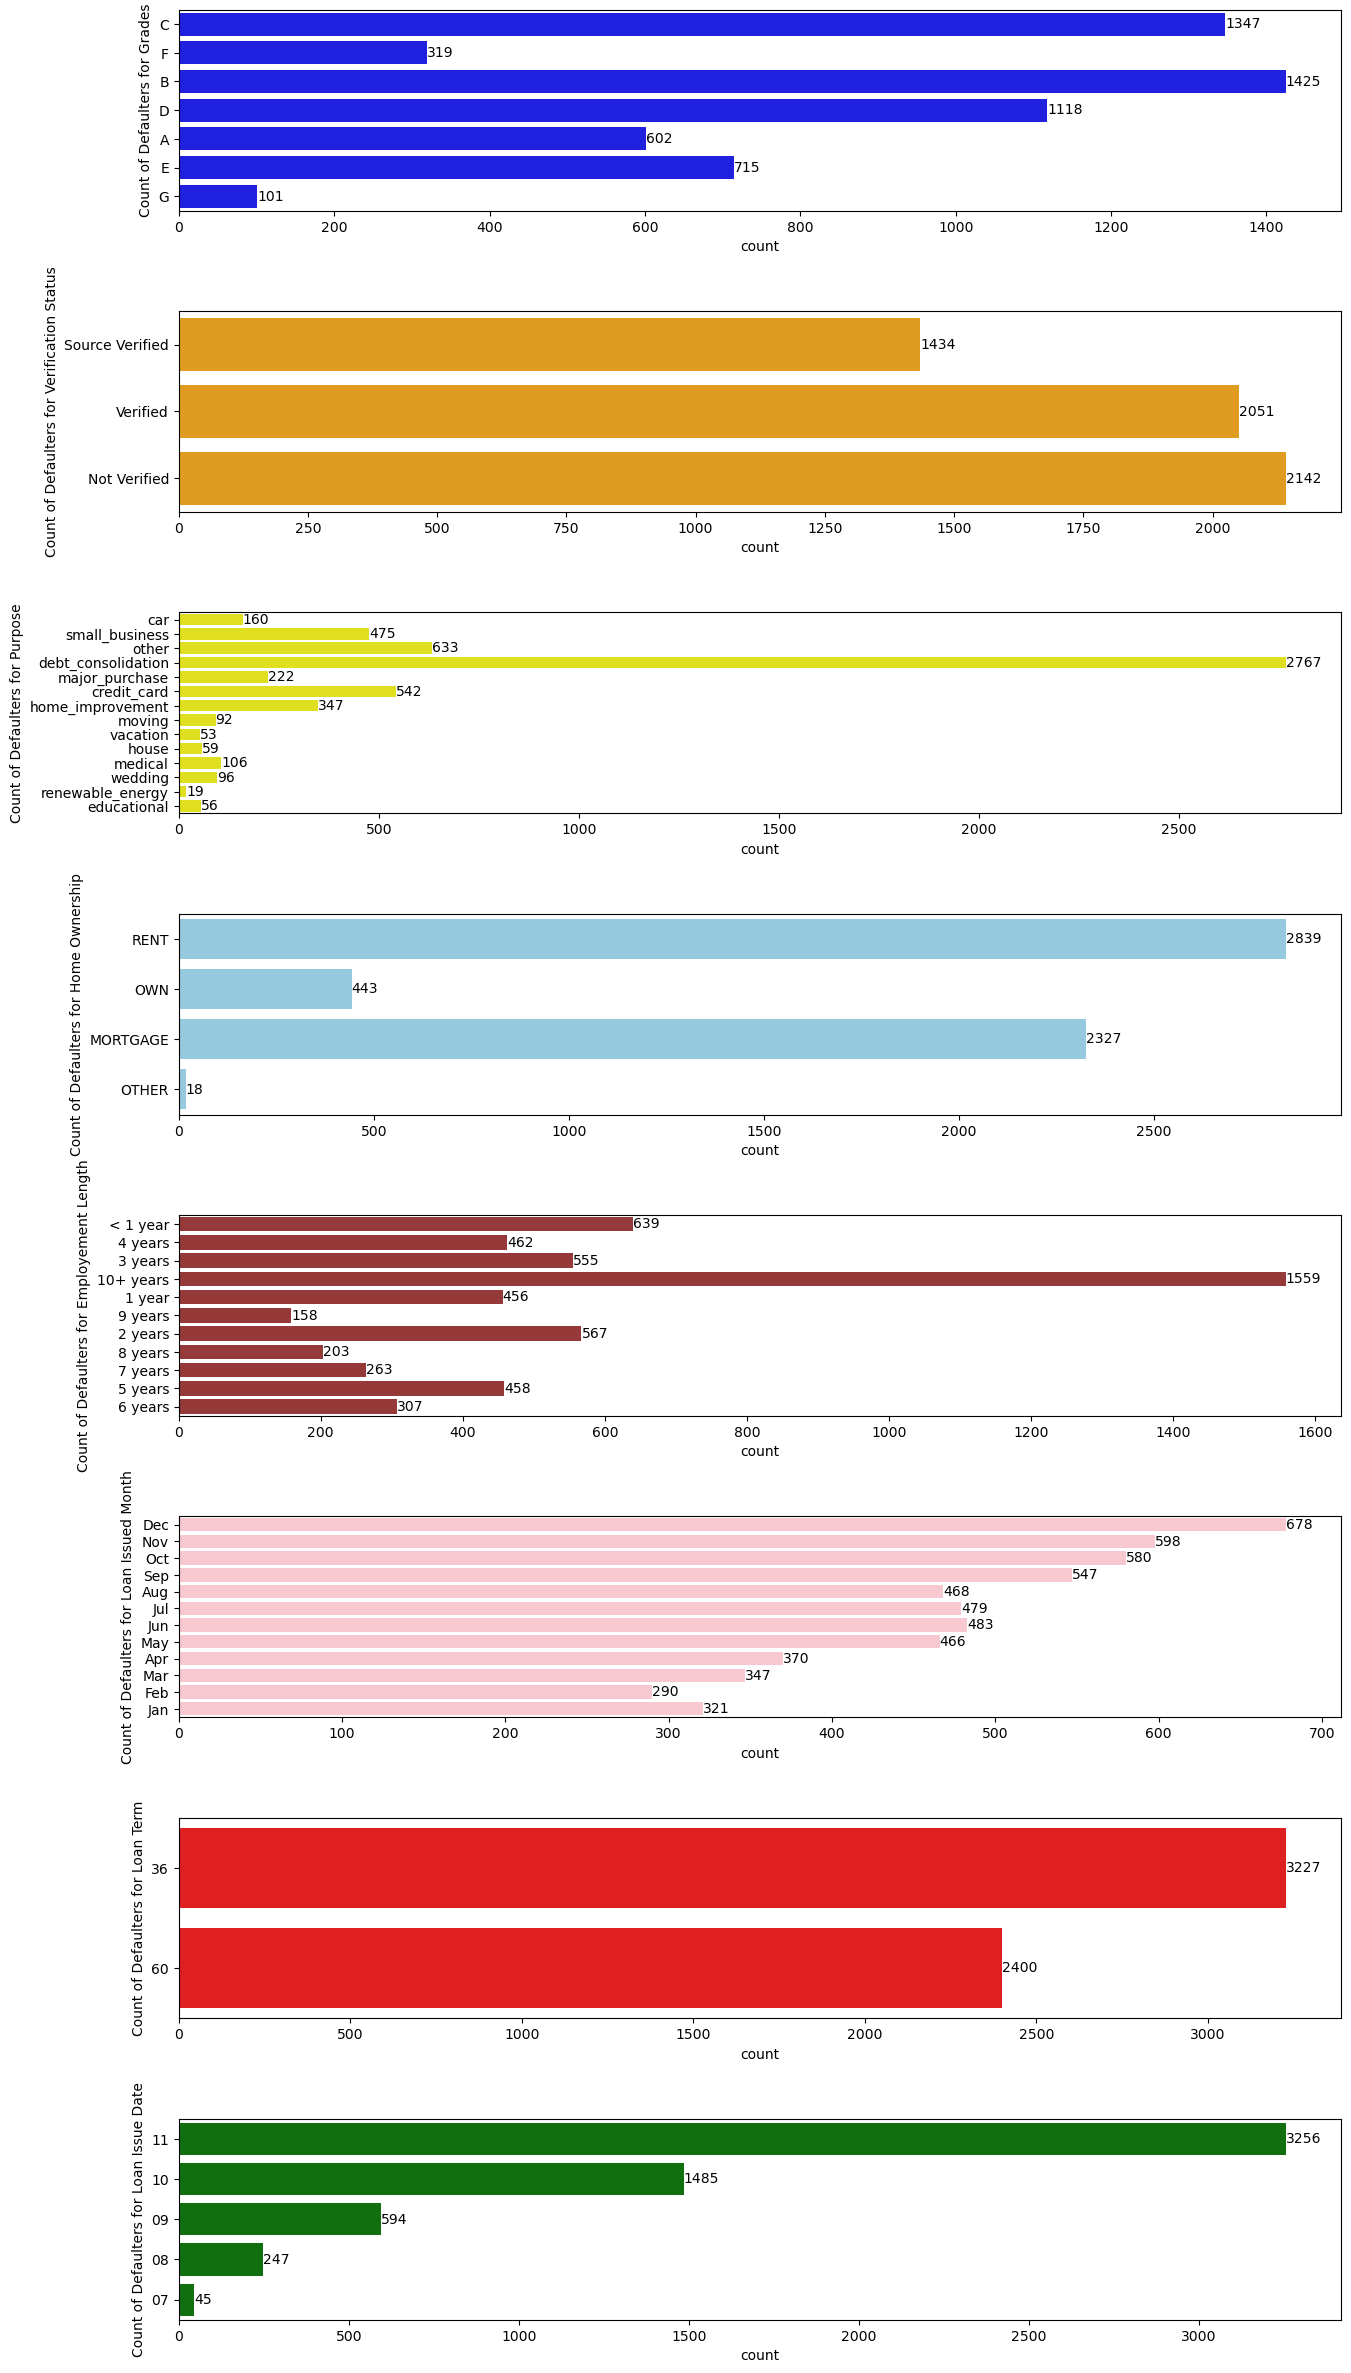

In [181]:
plt.clf()
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 ) = plt.subplots(8,1, figsize=(15,30))
ax1.set_ylabel('Count of Defaulters for Grades')
ax2.set_ylabel('Count of Defaulters for Verification Status')
ax3.set_ylabel('Count of Defaulters for Purpose')
ax4.set_ylabel('Count of Defaulters for Home Ownership')
ax5.set_ylabel('Count of Defaulters for Employement Length')
ax6.set_ylabel('Count of Defaulters for Loan Issued Month')
ax7.set_ylabel('Count of Defaulters for Loan Term')
ax8.set_ylabel('Count of Defaulters for Loan Issue Date')
#plt.figure(figsize=(5, 3))
sns.countplot(data=loan, y='grade', ax=ax1, orient='h', color='blue')
sns.countplot(data=loan, y='verification_status',  ax=ax2, color='orange')
sns.countplot(data=loan, y='purpose',  ax=ax3, color='yellow')
sns.countplot(data=loan, y='home_ownership',  ax=ax4, color='skyblue')
sns.countplot(data=loan, y='emp_length',  ax=ax5, color='brown')
sns.countplot(data=loan, y=loan.issue_m,  ax=ax6, color='pink')
sns.countplot(data=loan, y='term',  ax=ax7, color='red')
sns.countplot(data=loan, y=loan.issue_date,  ax=ax8, color='green')
ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])
ax3.bar_label(ax3.containers[0])
ax4.bar_label(ax4.containers[0])
ax5.bar_label(ax5.containers[0])
ax6.bar_label(ax6.containers[0])
ax7.bar_label(ax7.containers[0])
ax8.bar_label(ax8.containers[0])

plt.subplots_adjust(hspace = 0.5)
plt.show()


<Figure size 640x480 with 0 Axes>

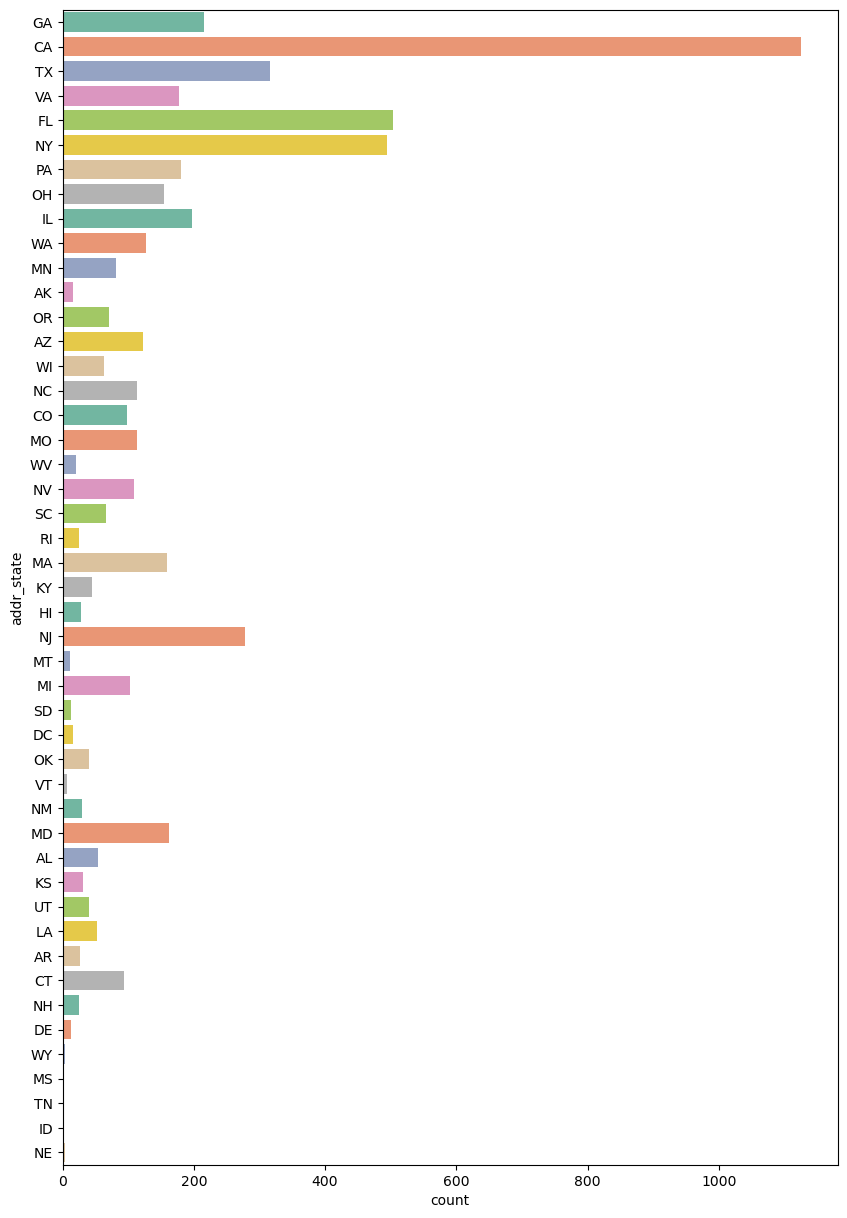

In [182]:
plt.clf()
plt.figure(figsize=(10,15))
sns.countplot(data=loan, y=loan.addr_state, palette = "Set2")
plt.show()

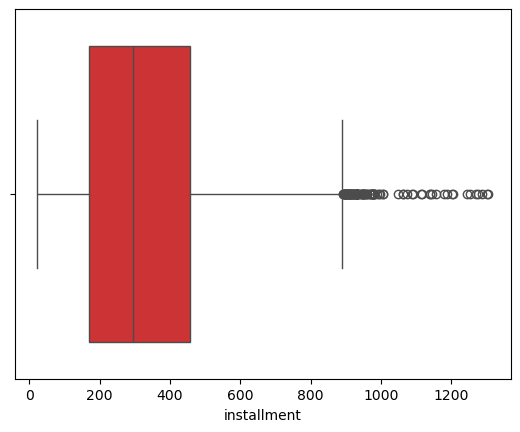

In [183]:
sns.boxplot( x=loan.installment, orient='v', palette="Set1")

plt.xlabel = "Installment Amount"
plt.ylabel= "Count of Defaulters"
plt.show()

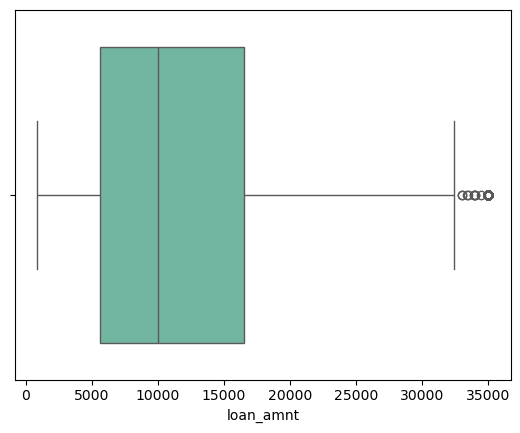

In [184]:
sns.boxplot( x=loan.loan_amnt, palette="Set2")
plt.xlabel = "Loan Amount"
plt.ylabel= "Count of Defaulters"
plt.show()

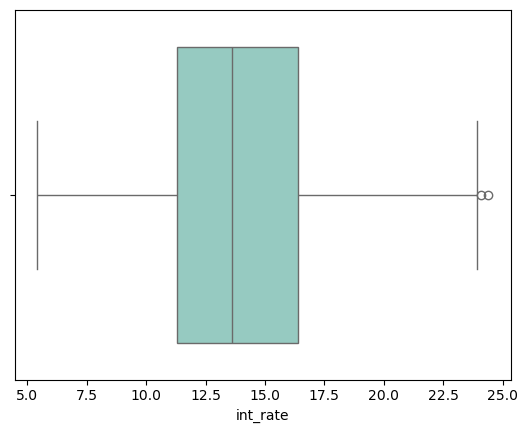

In [185]:
sns.boxplot( x=loan.int_rate, palette="Set3")
plt.xlabel = "Interest Rate"
plt.ylabel= "Count of Defaulters"
plt.show()

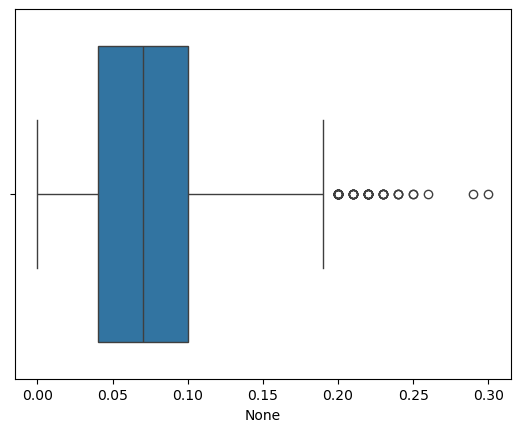

In [186]:

sns.boxplot( x=loan.monthly_installment_per)
plt.xlabel = "Percentage of amount in Installments"
plt.ylabel= "Count of Defaulters"
plt.show()

In [187]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5627 entries, 1 to 39688
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          5627 non-null   int64  
 1   member_id                   5627 non-null   int64  
 2   loan_amnt                   5627 non-null   int64  
 3   funded_amnt                 5627 non-null   int64  
 4   funded_amnt_inv             5627 non-null   float64
 5   term                        5627 non-null   int64  
 6   int_rate                    5627 non-null   float64
 7   installment                 5627 non-null   float64
 8   grade                       5627 non-null   object 
 9   sub_grade                   5627 non-null   object 
 10  emp_title                   5143 non-null   object 
 11  emp_length                  5627 non-null   object 
 12  home_ownership              5627 non-null   object 
 13  annual_inc                  5627 non-

In [171]:
loan.monthly_inc.value_counts()

annual_inc
5000.0     1505
4167.0     1157
3333.0      990
5417.0      880
3750.0      832
           ... 
4692.0        1
3894.0        1
12550.0       1
10050.0       1
2281.0        1
Name: count, Length: 4172, dtype: int64

In [170]:
loan.installment.value_counts()

installment
311.11     68
180.96     59
311.02     54
150.80     48
368.45     46
           ..
1224.46     1
63.44       1
157.67      1
492.34      1
255.43      1
Name: count, Length: 15383, dtype: int64

<Figure size 640x480 with 0 Axes>

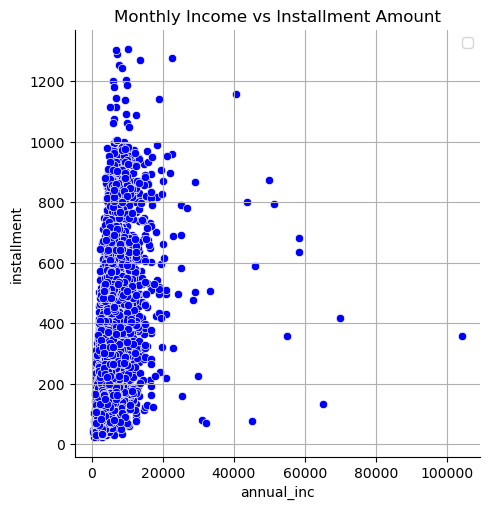

In [192]:
plt.clf()
sns.relplot(x=loan.monthly_inc, y=loan.installment, color='blue')
plt.title('Monthly Income vs Installment Amount')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

In [88]:
loan.annual_inc.value_counts()

annual_inc
60000.0    1505
50000.0    1057
40000.0     876
45000.0     830
30000.0     825
           ... 
56820.0       1
45314.0       1
53913.0       1
62880.0       1
27376.0       1
Name: count, Length: 5318, dtype: int64

In [193]:
loan.annual_inc.value_counts()

annual_inc
60000.0     256
50000.0     164
40000.0     156
30000.0     139
36000.0     131
           ... 
163400.0      1
12600.0       1
40512.0       1
64500.0       1
33990.0       1
Name: count, Length: 1253, dtype: int64

In [194]:
loan.loan_amnt.value_counts()

loan_amnt
10000    362
12000    303
5000     287
15000    259
25000    252
        ... 
15775      1
19475      1
4475       1
27200      1
3175       1
Name: count, Length: 487, dtype: int64

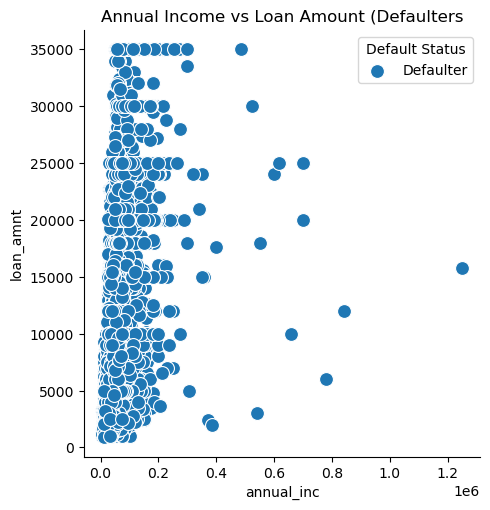

In [189]:
# Plot 
sns.relplot(x='annual_inc', y='loan_amnt',  data=loan, palette='coolwarm', s=100)
plt.title('Annual Income vs Loan Amount (Defaulters')
plt.legend(title='Default Status', loc='upper right', labels=['Defaulter'])
plt.show()

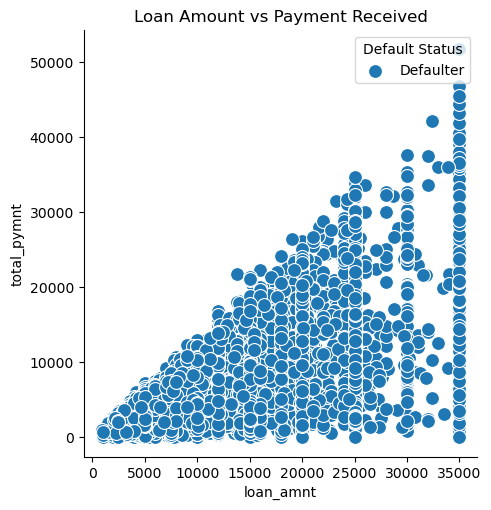

In [196]:
# Plot 
sns.relplot(x='loan_amnt', y='total_pymnt',  data=loan, palette='coolwarm', s=100)
plt.title('Loan Amount vs Payment Received')
plt.legend(title='Default Status', loc='upper right', labels=['Defaulter'])
plt.show()

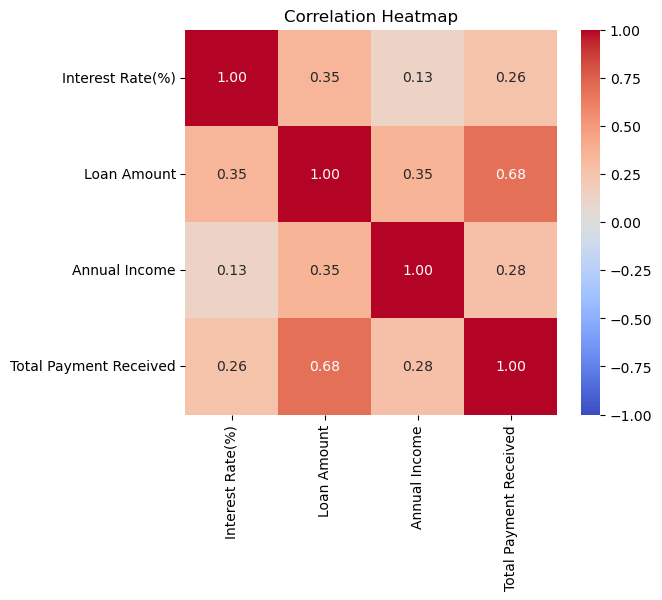

                        Interest Rate(%)  Loan Amount  Annual Income  \
Interest Rate(%)                1.000000     0.351216       0.132252   
Loan Amount                     0.351216     1.000000       0.352359   
Annual Income                   0.132252     0.352359       1.000000   
Total Payment Received          0.264457     0.680814       0.279975   

                        Total Payment Received  
Interest Rate(%)                      0.264457  
Loan Amount                           0.680814  
Annual Income                         0.279975  
Total Payment Received                1.000000  


In [197]:
# Interest rate v/s Loan Amount

# Create a DataFrame with the data
data = {'Interest Rate(%)': loan.int_rate, 'Loan Amount': loan.loan_amnt, 'Annual Income': loan.annual_inc,'Total Payment Received': loan.total_pymnt}
df = pd.DataFrame(data)
corr_matrix = df.corr()

# 2. Create a heatmap of the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt=".2f")

# Add title and labels
plt.title('Correlation Heatmap')
plt.show()

# Print the correlation matrix
print(corr_matrix)